## Cournot Duopoly with Dynamic Demand

### Packages

In [1]:
import numpy as np
np.set_printoptions(precision=2)
import scipy.stats as stats
import matplotlib.pyplot as plt

### Cournot

Dynamic Demand:
- $p_t = u_t - v \sum_i q_{it} + x_t$ 
- $x_t = \rho x_{t-1} + e_t, e_t \sim N(0,\sigma)$

Walrasian 
- $\pi_w = \max_{q_i}{(p - w) q_i}$ 
- $w = u - v Q$
- $Q_w = \frac{u-w}{v}$
- $P_w = w$
- $q_w \in [0,Q_w], \pi_w = 0, \Pi_w = 0$

Nash
- $\pi_c = \max_{q_i}{(p(Q) - w) q_i}$ 
- $p(Q) - w - v q_i = 0$
- $n p(Q) = n w + v Q = n u - n v Q$
- $Q_c = \frac{n(u-w)}{v(n+1)}$
- $P_c = u - v Q$
- $q_c = Q_c/n$

Monopoly
- $\pi_m = \max_{Q}{(p(Q) - w) Q}$ 
- $p(Q)=w+vQ=u-vQ$ 
- $Q_m =\frac{u-w}{2v}$ 
- $P_m =\frac{u-w}{2v}$


In [450]:
# parameters of model
gamma = 0.99
u = 40
v = 1
w = 4
n = 2
sigma = 0.05
rho = 0.1

In [451]:
def price(Q,u,v):
    return u-v*Q

def profit(P,Q):
    return
           
class cournot:
    def __init__(self,u,v,w,n):
        self.u=u
        self.v=v
        self.w=w
        self.n=n
        self.Qw=(u-w)/v
        self.Qc=n*(u-w)/v/(n+1)
        self.Qm=(u-w)/2*v
        self.Pw = price(self.Qw,u,v)
        self.Pc = price(self.Qc,u,v)
        self.Pm = price(self.Qm,u,v)
        self.Πw = 0
        self.Πc = (self.Pc-w)*self.Qc
        self.Πm = (self.Pm-w)*self.Qm
        self.qw = self.Qw/n
        self.qc = self.Qc/n
        self.qm = self.Qm/n
        self.πw = 0
        self.πc = self.Πc/n
        self.πm = self.Πm/n
    
    def mprice(self,Q):
        return self.u-v*(Q)
    
    def mprofit(self,Q):
        return (self.mprice(Q)-w)*Q
    
    def cprice(self,q,q_):
        return self.u-v*(q+q_)
    
    def cprofit(self,q,q_):
        return (self.cprice(q,q_)-w)*q
        
def whichidx(value, array):
    return np.argmin(np.abs(array-value))

game1 = cournot(u,v,w,n)

In [452]:
cournot(u+4,v,w,n).qc, cournot(u-4,v,w,n).qc,

(13.333333333333334, 10.666666666666666)

In [453]:
cournot(u+4,v,w,n).qm, cournot(u-4,v,w,n).qm,

(10.0, 8.0)

In [683]:
cournot(u+4,v,w,n).Qm, cournot(u-4,v,w,n).Qm

(18.0, 14.0)

### Shocks

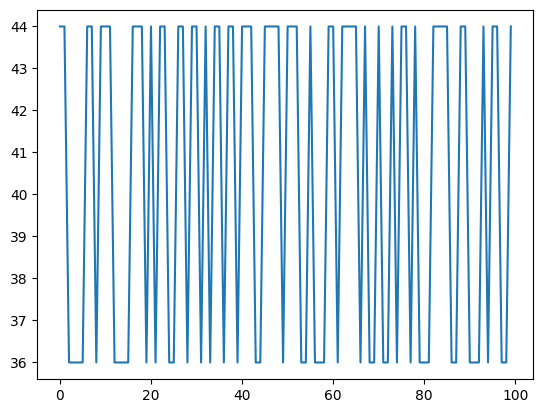

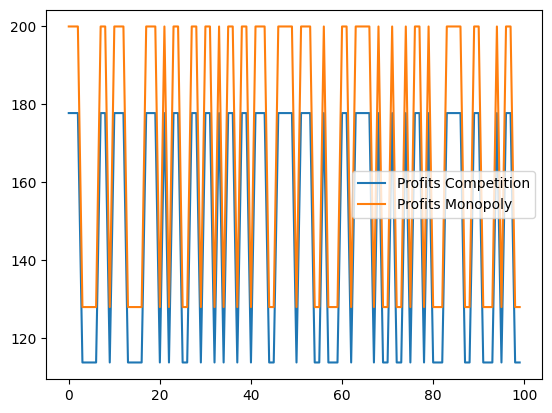

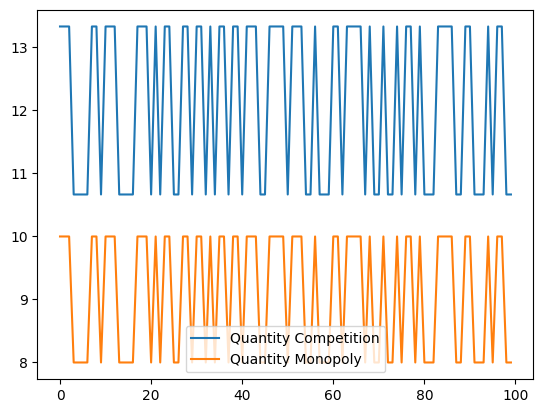

In [454]:
import numpy as np

P = np.array([[0.5,0.5],[0.5,0.5]])
Z = np.array([-4,+4])

u_history=[]
qc_history=[]
qm_history=[]
pc_history=[]
pm_history=[]

uidx = 1
u = 40 + Z[uidx]
for t in range(100):
    # evaluate market 
    qc_history.append(cournot(u,v,w,n).qc)
    qm_history.append(cournot(u,v,w,n).qm)
    pc_history.append(cournot(u,v,w,n).πc)
    pm_history.append(cournot(u,v,w,n).πm)

    # generate next shock
    uidx = whichidx(np.random.choice(Z,p=P[uidx]), Z)
    u = 40 + Z[uidx]
    u_history.append(u)
    
plt.plot(u_history)
plt.show()

plt.plot(pc_history, label = 'Profits Competition')
plt.plot(pm_history, label = 'Profits Monopoly')
plt.legend()
plt.show()

plt.plot(qc_history, label = 'Quantity Competition')
plt.plot(qm_history, label = 'Quantity Monopoly')
plt.legend()
plt.show()

### Q-Learning

In [646]:
import random
import numpy as np

# initialize the Q-table
game = game1
num_states1 = 5
num_states2 = 2
num_actions = 5
P = np.array([[0.5,0.5],[0.5,0.5]])
Z = np.array([-4,+4])

# initialize the states
state1 = 0
state2 = 0
uidx = int(round(num_states2/2))
u = 40 + Z[uidx]

# parameters of model
gamma = 0.9
u = 40
v = 1
w = 4
n = 2

# Define Q matrices
Q1 = np.random.uniform(cournot(u,v,w,n).Πc,cournot(u,v,w,n).Πm,(num_states1, num_states2, num_actions))
Q2 = np.random.uniform(cournot(u,v,w,n).Πc,cournot(u,v,w,n).Πm,(num_states1, num_states2, num_actions))

# histories
u_history = []
q1_history = []
q2_history = []
qc_history=[]
qm_history=[]
pc_history=[]
pm_history=[]

u1 = 40 + Z[0]
u2 = 40 + Z[-1]
print(cournot(u1,v,w,n).qm,cournot(u2,v,w,n).qc)

action2quantity = np.linspace(8,13.333333333333334,num_actions)
action2quantity

8.0 13.333333333333334


array([ 8.  ,  9.33, 10.67, 12.  , 13.33])

In [647]:
# define the Boltzmann action selection function
def boltzmann_action_selection(Q, state1, state2, temperature):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state1, state2,:])
    logits = (Q[state1, state2,:] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    # select an action using the computed probabilities
    action = np.random.choice(range(len(probs)), p=probs)
    return action

In [648]:
# initialize Boltzmann Q-learning parameters
alpha = 0.1
initial_temperature = 1.0
temperature_decay = 0.99999
min_temperature = 0.01
temperature = initial_temperature
initial_eps = 1.0
eps_decay = 0.99999
min_eps = 0.01
eps = initial_eps
errors = []
num_episodes = 1000000
errors0 = []
rewards0 = []
actions0 = []
errors1 = []
rewards1 = []
actions1 = []

In [649]:
# run Boltzmann Q-learning for a fixed number of episodes
for episode in range(num_episodes):
    
    # Act according to exploratory policy
    if np.random.uniform()>eps:
        # Boltzmann action selection
        action1 = boltzmann_action_selection(Q1, state1, uidx, temperature)
    else:
        action1 = np.random.choice(range(num_actions))

    if np.random.uniform()>eps:
        # Boltzmann action selection
        action2 = boltzmann_action_selection(Q2, state2, uidx, temperature)
    else:
        action2 = np.random.choice(range(num_actions))
        
    quantity1 = action2quantity[action1]
    quantity2 = action2quantity[action2]

    # Get rewards
    reward1 = cournot(u,v,w,n).cprofit(quantity1,quantity2)
    reward2 = cournot(u,v,w,n).cprofit(quantity2,quantity1)

    # update the Q-value for the selected action in the current state
    Q1[state1][uidx][action1] =  (1-alpha)*Q1[state1][uidx][action1] + alpha * (reward1 + gamma * np.max(np.average(Q1[state1],axis=0,weights=P[uidx])))
    Q2[state2][uidx][action2] =  (1-alpha)*Q2[state2][uidx][action2] + alpha * (reward2 + gamma * np.max(np.average(Q2[state2],axis=0,weights=P[uidx])))

    # update states
    state1 = action2
    state2 = action1
    
    # generate shock
    uidx = whichidx(np.random.choice(Z,p=P[uidx]), Z)
    u = 40 + Z[uidx]
    
    # update temperature
    temperature = max(min_temperature, temperature * temperature_decay)
    
    # print output
    eps = max(min_eps, eps * eps_decay)
    if uidx == 0:
        error1 = reward1 + gamma * np.max(np.average(Q1[state1],axis=0,weights=P[uidx]))-Q1[state1][uidx][action1] 
        errors0.append(error1)
        rewards0.append(reward1)
        actions0.append(action1)
    if uidx == 1:
        error1 = reward1 + gamma * np.max(np.average(Q1[state1],axis=0,weights=P[uidx]))-Q1[state1][uidx][action1] 
        errors1.append(error1)
        rewards1.append(reward1)
        actions1.append(action1)
        
    if episode%10000 == 0:  
        print('\n')
        print(f'{episode},{np.mean(errors0[-10000:]):0.2f},{np.mean(actions0[-10000:]):0.2f}, {np.mean(rewards0[-10000:]):0.2f}, {temperature:0.2f}, {eps:0.2f}')
        print(f'{episode},{np.mean(errors1[-10000:]):0.2f},{np.mean(actions1[-10000:]):0.2f}, {np.mean(rewards1[-10000:]):0.2f}, {temperature:0.2f}, {eps:0.2f}')

    # record history
    u_history.append(u)
    q1_history.append(quantity1)
    q2_history.append(quantity2)
    qc_history.append(cournot(u,v,w,n).qc)
    qm_history.append(cournot(u,v,w,n).qm)



0,nan,nan, nan, 1.00, 1.00
0,140.13,2.00, 170.67, 1.00, 1.00


10000,52.03,2.01, 152.28, 0.90, 0.90
10000,-32.03,2.03, 152.36, 0.90, 0.90


20000,46.68,2.04, 152.36, 0.82, 0.82
20000,-36.19,2.07, 152.27, 0.82, 0.82


30000,45.36,2.12, 153.04, 0.74, 0.74
30000,-39.35,2.14, 152.17, 0.74, 0.74


40000,46.12,2.18, 152.46, 0.67, 0.67
40000,-37.64,2.17, 152.43, 0.67, 0.67


50000,45.37,2.21, 151.04, 0.61, 0.61
50000,-36.35,2.19, 152.05, 0.61, 0.61


60000,46.37,2.23, 151.29, 0.55, 0.55
60000,-35.08,2.23, 151.34, 0.55, 0.55


70000,47.65,2.26, 151.17, 0.50, 0.50
70000,-33.62,2.26, 151.42, 0.50, 0.50


80000,48.44,2.31, 151.20, 0.45, 0.45
80000,-31.74,2.29, 152.54, 0.45, 0.45


90000,49.33,2.34, 151.69, 0.41, 0.41
90000,-31.66,2.32, 152.16, 0.41, 0.41


100000,50.28,2.39, 151.99, 0.37, 0.37
100000,-31.73,2.38, 151.32, 0.37, 0.37


110000,49.90,2.39, 151.44, 0.33, 0.33
110000,-30.25,2.39, 151.80, 0.33, 0.33


120000,49.85,2.37, 150.67, 0.30, 0.30
120000,-29.87,2.37, 151.41, 0.30, 0.30


13000

KeyboardInterrupt: 

### Response Functions

In [650]:
print(num_actions)
for uidx in range(num_states2):
    for state1 in range(num_states1):
        action1 = boltzmann_action_selection(Q1, state1, uidx, 0.0001)
        print((state1,uidx), action1)

5
(0, 0) 3
(1, 0) 2
(2, 0) 2
(3, 0) 0
(4, 0) 4
(0, 1) 4
(1, 1) 4
(2, 1) 4
(3, 1) 3
(4, 1) 4


In [651]:
print(num_actions)
for uidx in range(num_states2):
    for state1 in range(num_states1):
        action2 = boltzmann_action_selection(Q2, state1, uidx, 0.0001)
        print((state1,uidx), action2)

5
(0, 0) 3
(1, 0) 1
(2, 0) 3
(3, 0) 2
(4, 0) 2
(0, 1) 3
(1, 1) 4
(2, 1) 4
(3, 1) 2
(4, 1) 3


### Check Probs 

In [652]:
# define the Boltzmann action selection function
def boltzmann_action_probs(Q, state1, state2, temperature=0.001):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state1, state2,:])
    logits = (Q[state1, state2,:] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    return probs

In [653]:
# Average Response
for uidx in range(num_states2):
        print(uidx,np.round(boltzmann_action_probs(Q1,state1, uidx),2))

0 [0. 0. 0. 0. 1.]
1 [0. 0. 0. 0. 1.]


### Plot

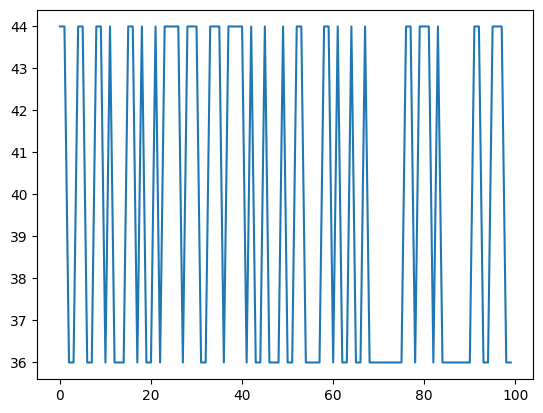

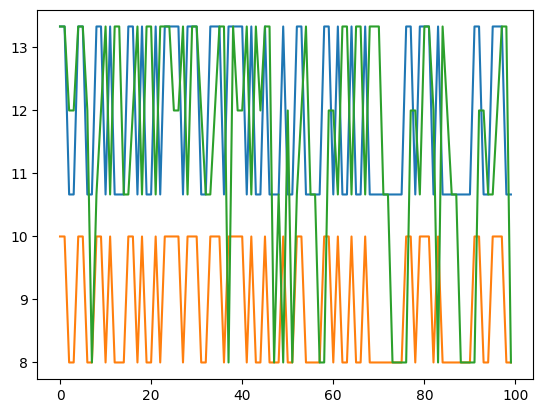

In [654]:
import matplotlib.pyplot as plt
k = 100
plt.plot(u_history[-k:])
plt.show()

plt.plot(qc_history[-k:])
plt.plot(qm_history[-k:])
plt.plot(q1_history[-k:])
plt.show()

### Correlations with shocks

In [655]:
k = 1000
np.corrcoef(u_history[-k:], q1_history[-k:])

array([[ 1.  , -0.01],
       [-0.01,  1.  ]])

### Impulse Response

In [656]:
num_actions

5

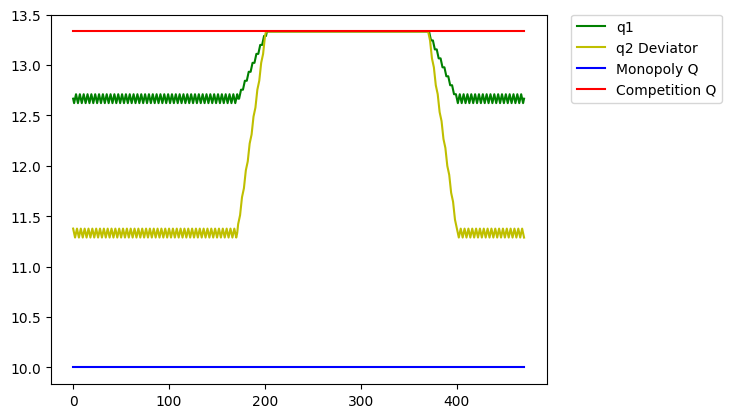

In [670]:
uidx = 1
u = 40 + Z[uidx]
u_impulse=[]
q1_impulse=[]
q2_impulse=[]
qm_impulse = []
qc_impulse = []
temperature_impulse=0.000001
state1 = 0
state2 = 0
# run Boltzmann Q-learning for a fixed number of episodes
num_episodes = 500
for episode in range(num_episodes):
        
    # Act greedily
    action1 = boltzmann_action_selection(Q1, state1, uidx, temperature_impulse)
    action2 = boltzmann_action_selection(Q2, state2, uidx, temperature_impulse)

    if (episode > num_episodes*2/5) and (episode<num_episodes*4/5):
        action2=np.minimum(action2+2,4)
        
    quantity1 = action2quantity[action1]
    quantity2 = action2quantity[action2]

    # Get rewards
    reward1 = cournot(u,v,w,n).cprofit(quantity1,quantity2)
    reward2 = cournot(u,v,w,n).cprofit(quantity2,quantity1)

    # update states
    state1 = action2
    state2 = action1
    
    # generate shock
    #uidx = whichidx(np.random.choice(Z,p=P[uidx]), Z)
    #u = 40 + Z[uidx]

    # record history
    u_impulse.append(u)
    q1_impulse.append(quantity1)
    q2_impulse.append(quantity2)
    qc_impulse.append(cournot(u,v,w,n).qc)
    qm_impulse.append(cournot(u,v,w,n).qm)
    
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

import matplotlib.pyplot as plt
plt.plot(moving_average(q1_impulse,30), 'g', label = 'q1')
plt.plot(moving_average(q2_impulse,30), 'y', label = 'q2 Deviator')
plt.plot(moving_average(qm_impulse,30), 'b', label = 'Monopoly Q')
plt.plot(moving_average(qc_impulse,30), 'r', label = 'Competition Q')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

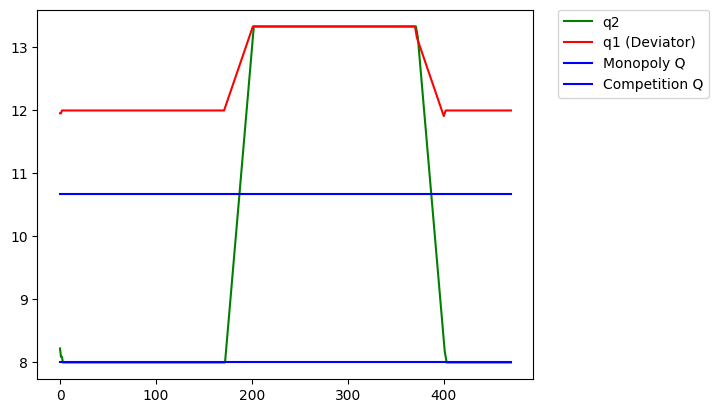

In [675]:
uidx = 0
u = 40 + Z[uidx]
u_impulse=[]
q1_impulse=[]
q2_impulse=[]
qm_impulse = []
qc_impulse = []
temperature_impulse=0.000001
state1 = 0
state2 = 0
# run Boltzmann Q-learning for a fixed number of episodes
num_episodes = 500
for episode in range(num_episodes):
        
    # Act greedily
    action1 = boltzmann_action_selection(Q1, state1, uidx, temperature_impulse)
    action2 = boltzmann_action_selection(Q2, state2, uidx, temperature_impulse)

    if (episode > num_episodes*2/5) and (episode<num_episodes*4/5):
        action2=np.minimum(action2+2,4)
        
    quantity1 = action2quantity[action1]
    quantity2 = action2quantity[action2]

    # Get rewards
    reward1 = cournot(u,v,w,n).cprofit(quantity1,quantity2)
    reward2 = cournot(u,v,w,n).cprofit(quantity2,quantity1)

    # update states
    state1 = action2
    state2 = action1
    
    # generate shock
    #uidx = whichidx(np.random.choice(Z,p=P[uidx]), Z)
    #u = 40 + Z[uidx]

    # record history
    u_impulse.append(u)
    q1_impulse.append(quantity1)
    q2_impulse.append(quantity2)
    qc_impulse.append(cournot(u,v,w,n).qc)
    qm_impulse.append(cournot(u,v,w,n).qm)
    
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

import matplotlib.pyplot as plt
plt.plot(moving_average(q1_impulse,30), c='g',  label = 'q2')
plt.plot(moving_average(q2_impulse,30), c='r',  label = 'q1 (Deviator)')
plt.plot(moving_average(qm_impulse,30), 'b', label = 'Monopoly Q')
plt.plot(moving_average(qc_impulse,30), 'b', label = 'Competition Q')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()